# Regression trees

Nett: https://www.youtube.com/watch?v=g9c66TUylZ4

## Regression trees

### Sample data

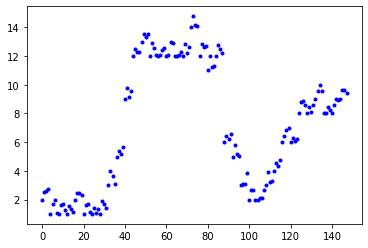

In [1]:
from pylab import *

seed(0)
y0=[2, 1, 1, 1, 2, 1, 1, 1, 3, 5, 9, 12, 13, 12, 12, 12, 12, 12, 14, 12, 11, 12, 6, 5, 3, 2, 2, 3, 4, 6, 6, 8, 8, 9, 8, 8, 9];
y = ones((4*len(y0),))
y[0::4]=y0;
y[1::4]=y0+rand(size(y0))
y[2::4]=y0+rand(size(y0))
y[3::4]=y0+rand(size(y0))
x = arange(len(y))

plot(x,y,'b.');

### Train and show results

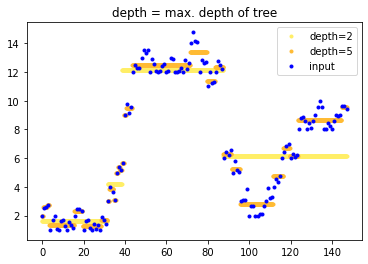

In [2]:
from sklearn.tree import DecisionTreeRegressor

d=[2,5]

regr_1 = DecisionTreeRegressor(max_depth=d[0])
regr_2 = DecisionTreeRegressor(max_depth=d[1])

X = array(x).reshape(len(x),1);
y = array(y).reshape(len(y),);
regr_1.fit(X, y)
regr_2.fit(X, y)

X_test = linspace(x.min(), x.max(),1000).reshape((-1,1))
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

title("depth = max. depth of tree")
plot(X_test,y_1,'.', color='#ffee66', label=f"depth={d[0]}");
plot(X_test,y_2,'.', color='#ffbb33', label=f"depth={d[1]}");
plot(x,y,'b.', label='input')
legend();

### Generate code

In [3]:
# adapted from https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree

def get_code(tree, feature_names):
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, indent=0):
        if (threshold[node] != -2):
            print(" "*indent + "if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
            if left[node] != -1:
                recurse (left, right, threshold, features,left[node], indent+2)
            print(" "*indent + "} else {")
            if right[node] != -1:
                recurse (left, right, threshold, features,right[node], indent+2)
            print(" "*indent + "}")
        else:
            print(" "*(indent) + "return " + str(value[node]))

    recurse(left, right, threshold, features, 0)

get_code(regr_1,['x','y'])

if ( x <= 38.5 ) {
  if ( x <= 31.5 ) {
    return [[1.61258729]]
  } else {
    return [[4.18461032]]
  }
} else {
  if ( x <= 87.5 ) {
    return [[12.13989767]]
  } else {
    return [[6.16311167]]
  }
}


## Random forest regressor

tree with depth=2: node count=7
tree with depth=5: node count=55


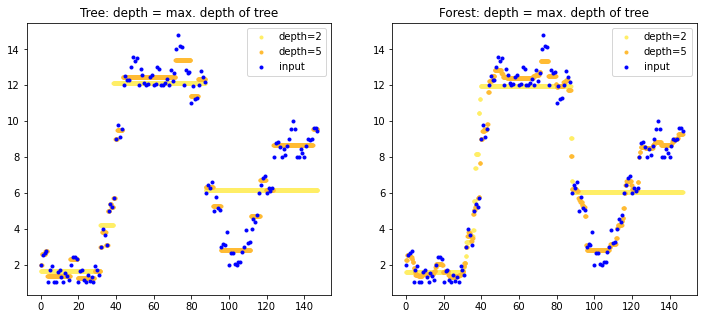

In [4]:
from sklearn.ensemble import RandomForestRegressor

forest_1 = RandomForestRegressor(max_depth=d[0], n_estimators=10)
forest_2 = RandomForestRegressor(max_depth=d[1], n_estimators=10)

forest_1.fit(X, y)
forest_2.fit(X, y)

fy_1 = forest_1.predict(X_test)
fy_2 = forest_2.predict(X_test)

figure(figsize=[12,5])
subplot(1,2,1)
title("Tree: depth = max. depth of tree")
plot(X_test,y_1,'.', color='#ffee66', label=f"depth={d[0]}");
plot(X_test,y_2,'.', color='#ffbb33', label=f"depth={d[1]}");
plot(x,y,'b.', label='input')
legend();

subplot(1,2,2)
title("Forest: depth = max. depth of tree")
plot(X_test,fy_1,'.', color='#ffee66', label=f"depth={d[0]}");
plot(X_test,fy_2,'.', color='#ffbb33', label=f"depth={d[1]}");
plot(x,y,'b.', label='input')
legend();

print(f"tree with depth={d[0]}: node count={regr_1.tree_.node_count}");
print(f"tree with depth={d[1]}: node count={regr_2.tree_.node_count}");
#print(f"forest with depth={d[0]}: node count={forest_1.tree_.node_count}");
#print(f"forest with depth={d[1]}: node count={forest_2.tree_.node_count}");

## Linear Trees

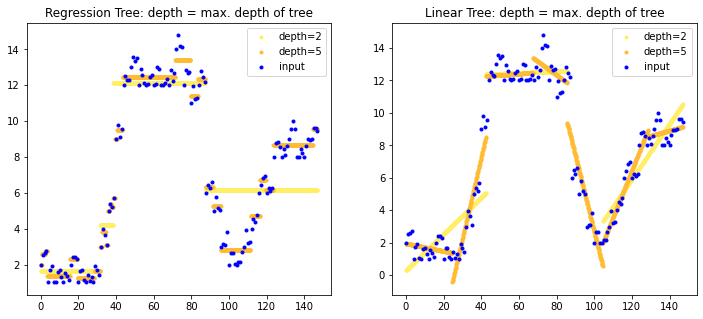

In [5]:
from lineartree import LinearTreeRegressor
from sklearn.linear_model import LinearRegression 

ltree_1 = LinearTreeRegressor(max_depth=d[0], base_estimator=LinearRegression())
ltree_2 = LinearTreeRegressor(max_depth=d[1], base_estimator=LinearRegression())

ltree_1.fit(X, y)
ltree_2.fit(X, y)

ly_1 = ltree_1.predict(X_test)
ly_2 = ltree_2.predict(X_test)

figure(figsize=[12,5])
subplot(1,2,1)
title("Regression Tree: depth = max. depth of tree")
plot(X_test,y_1,'.', color='#ffee66', label=f"depth={d[0]}");
plot(X_test,y_2,'.', color='#ffbb33', label=f"depth={d[1]}");
plot(x,y,'b.', label='input')
legend();

subplot(1,2,2)
title("Linear Tree: depth = max. depth of tree")
plot(X_test,ly_1,'.', color='#ffee66', label=f"depth={d[0]}");
plot(X_test,ly_2,'.', color='#ffbb33', label=f"depth={d[1]}");
plot(x,y,'b.', label='input')
legend();

## Linear Forests

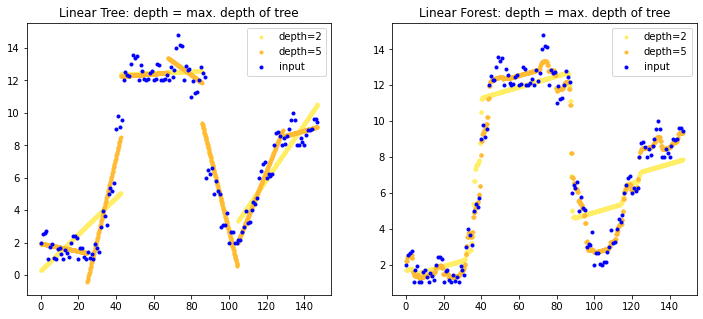

In [6]:
from lineartree import LinearForestRegressor
from sklearn.linear_model import LinearRegression 

lforest_1 = LinearForestRegressor(max_depth=d[0], base_estimator=LinearRegression())
lforest_2 = LinearForestRegressor(max_depth=d[1], base_estimator=LinearRegression())

lforest_1.fit(X, y)
lforest_2.fit(X, y)

lfy_1 = lforest_1.predict(X_test)
lfy_2 = lforest_2.predict(X_test)

figure(figsize=[12,5])
subplot(1,2,1)
title("Linear Tree: depth = max. depth of tree")
plot(X_test,ly_1,'.', color='#ffee66', label=f"depth={d[0]}");
plot(X_test,ly_2,'.', color='#ffbb33', label=f"depth={d[1]}");
plot(x,y,'b.', label='input')
legend();

subplot(1,2,2)
title("Linear Forest: depth = max. depth of tree")
plot(X_test,lfy_1,'.', color='#ffee66', label=f"depth={d[0]}");
plot(X_test,lfy_2,'.', color='#ffbb33', label=f"depth={d[1]}");
plot(x,y,'b.', label='input')
legend();